<a href="https://colab.research.google.com/github/swetha0069/AIML_Task10/blob/main/Task10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: X=(1797, 64), y=(1797,)


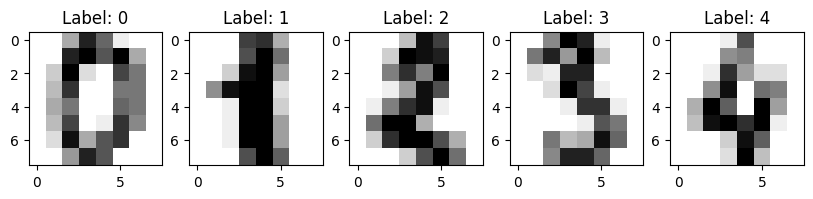

Accuracy for K=3: 0.9694
Accuracy for K=5: 0.9750
Accuracy for K=7: 0.9722
Accuracy for K=9: 0.9722


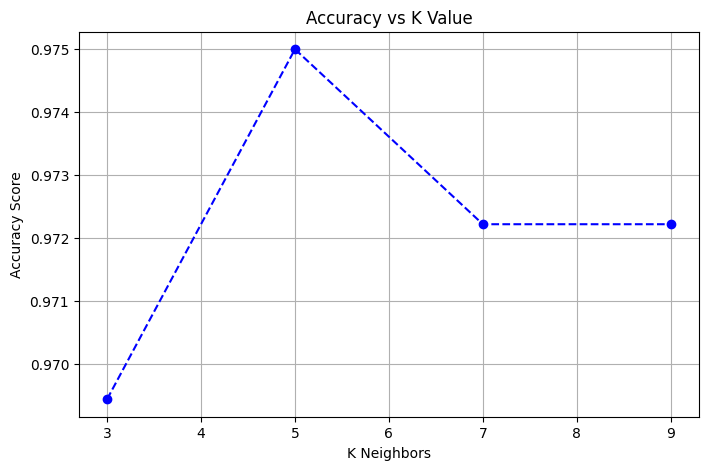

<Figure size 800x600 with 0 Axes>

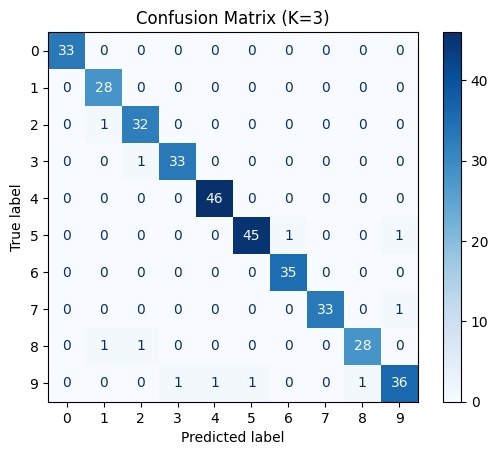

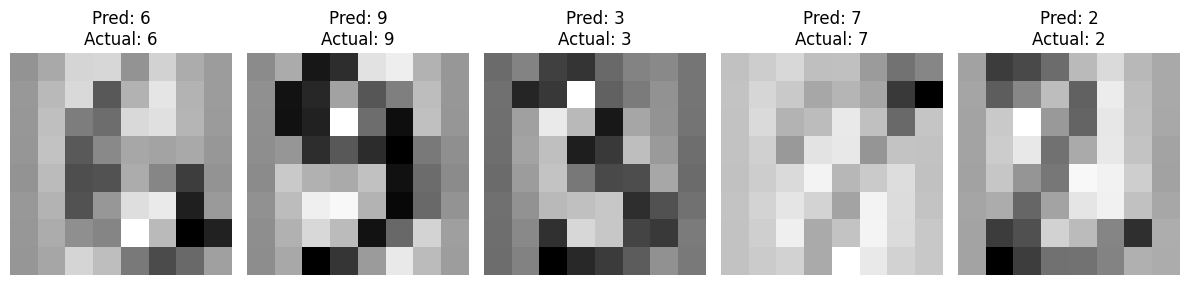

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# 1. Load digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

print(f"Dataset shape: X={X.shape}, y={y.shape}")

# 2. Visualize a few digit images
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(digits.images[:5], digits.target[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {label}')
plt.show()

# 3. Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature Scaling (Crucial for KNN distance calculations)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5 & 6. Try multiple K values (3, 5, 7, 9)
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy for K={k}: {acc:.4f}")

# 7. Plot accuracy vs K graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='blue')
plt.title('Accuracy vs K Value')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

# 8. Generate Confusion Matrix for the best K (let's use K=3 as per instructions)
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names).plot(cmap='Blues')
plt.title('Confusion Matrix (K=3)')
plt.show()

# 9. Display 5 test images with predicted labels
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # Reshape back to 8x8 for visualization
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.title(f"Pred: {y_pred_best[i]}\nActual: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Project Summary
Model: K-Nearest Neighbors (KNN) for handwritten digit recognition.
Dataset: Sklearn load_digits (8x8 pixel images).
Preprocessing: Used StandardScaler to ensure distance-based calculations were accurate.
Optimization: Tested $K$ values (3, 5, 7, 9); found $K=3$ optimal for this dataset.
Results: Visualized via Accuracy vs. K plot and Confusion Matrix.
Final Output: High-accuracy classification with successful visual verification of test digits.